In [1]:
# Importing required libraries- sklearn, tf, keras, pandas, matplotlib, numpy
import os
import matplotlib
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras.models import Sequential
from matplotlib.pyplot import figure
from keras.layers import LSTM, SimpleRNN, GRU
from keras.preprocessing import sequence
from keras.layers import Dense, Embedding 
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [2]:
#Path to the directory
path = '../Data/timeseries/'

In [3]:
#Reading the metadata file and sorting by filename
df_metadata = pd.read_csv('../Data/crop_type_kenya_2017_metadata.csv')
df_metadata =df_metadata.sort_values('fileName')

In [4]:
#Reading the image data (npy files)
crop_data = []
for file_name in os.listdir(path):
    print(file_name)
    file = np.load(path+file_name, allow_pickle=True)
    crop_data.append(file)

kenya_2017_sentinel2_timeseries_0.npy
kenya_2017_sentinel2_timeseries_1.npy
kenya_2017_sentinel2_timeseries_10.npy
kenya_2017_sentinel2_timeseries_100.npy
kenya_2017_sentinel2_timeseries_1000.npy
kenya_2017_sentinel2_timeseries_1001.npy
kenya_2017_sentinel2_timeseries_1002.npy
kenya_2017_sentinel2_timeseries_1003.npy
kenya_2017_sentinel2_timeseries_1004.npy
kenya_2017_sentinel2_timeseries_1005.npy
kenya_2017_sentinel2_timeseries_1006.npy
kenya_2017_sentinel2_timeseries_1007.npy
kenya_2017_sentinel2_timeseries_1008.npy
kenya_2017_sentinel2_timeseries_1009.npy
kenya_2017_sentinel2_timeseries_101.npy
kenya_2017_sentinel2_timeseries_1010.npy
kenya_2017_sentinel2_timeseries_1011.npy
kenya_2017_sentinel2_timeseries_1012.npy
kenya_2017_sentinel2_timeseries_1013.npy
kenya_2017_sentinel2_timeseries_1014.npy
kenya_2017_sentinel2_timeseries_1015.npy
kenya_2017_sentinel2_timeseries_1016.npy
kenya_2017_sentinel2_timeseries_1017.npy
kenya_2017_sentinel2_timeseries_1018.npy
kenya_2017_sentinel2_times

kenya_2017_sentinel2_timeseries_141.npy
kenya_2017_sentinel2_timeseries_1410.npy
kenya_2017_sentinel2_timeseries_1411.npy
kenya_2017_sentinel2_timeseries_1412.npy
kenya_2017_sentinel2_timeseries_1413.npy
kenya_2017_sentinel2_timeseries_1414.npy
kenya_2017_sentinel2_timeseries_1415.npy
kenya_2017_sentinel2_timeseries_1416.npy
kenya_2017_sentinel2_timeseries_1417.npy
kenya_2017_sentinel2_timeseries_1418.npy
kenya_2017_sentinel2_timeseries_1419.npy
kenya_2017_sentinel2_timeseries_142.npy
kenya_2017_sentinel2_timeseries_1420.npy
kenya_2017_sentinel2_timeseries_1421.npy
kenya_2017_sentinel2_timeseries_1422.npy
kenya_2017_sentinel2_timeseries_1423.npy
kenya_2017_sentinel2_timeseries_1424.npy
kenya_2017_sentinel2_timeseries_1425.npy
kenya_2017_sentinel2_timeseries_1426.npy
kenya_2017_sentinel2_timeseries_1427.npy
kenya_2017_sentinel2_timeseries_1428.npy
kenya_2017_sentinel2_timeseries_1429.npy
kenya_2017_sentinel2_timeseries_143.npy
kenya_2017_sentinel2_timeseries_1430.npy
kenya_2017_sentinel

kenya_2017_sentinel2_timeseries_1816.npy
kenya_2017_sentinel2_timeseries_1817.npy
kenya_2017_sentinel2_timeseries_1818.npy
kenya_2017_sentinel2_timeseries_1819.npy
kenya_2017_sentinel2_timeseries_182.npy
kenya_2017_sentinel2_timeseries_1820.npy
kenya_2017_sentinel2_timeseries_1821.npy
kenya_2017_sentinel2_timeseries_1822.npy
kenya_2017_sentinel2_timeseries_1823.npy
kenya_2017_sentinel2_timeseries_1824.npy
kenya_2017_sentinel2_timeseries_1825.npy
kenya_2017_sentinel2_timeseries_1826.npy
kenya_2017_sentinel2_timeseries_1827.npy
kenya_2017_sentinel2_timeseries_1828.npy
kenya_2017_sentinel2_timeseries_1829.npy
kenya_2017_sentinel2_timeseries_183.npy
kenya_2017_sentinel2_timeseries_1830.npy
kenya_2017_sentinel2_timeseries_1831.npy
kenya_2017_sentinel2_timeseries_1832.npy
kenya_2017_sentinel2_timeseries_1833.npy
kenya_2017_sentinel2_timeseries_1834.npy
kenya_2017_sentinel2_timeseries_1835.npy
kenya_2017_sentinel2_timeseries_1836.npy
kenya_2017_sentinel2_timeseries_1837.npy
kenya_2017_sentine

kenya_2017_sentinel2_timeseries_2249.npy
kenya_2017_sentinel2_timeseries_225.npy
kenya_2017_sentinel2_timeseries_2250.npy
kenya_2017_sentinel2_timeseries_2251.npy
kenya_2017_sentinel2_timeseries_2252.npy
kenya_2017_sentinel2_timeseries_2253.npy
kenya_2017_sentinel2_timeseries_2254.npy
kenya_2017_sentinel2_timeseries_2255.npy
kenya_2017_sentinel2_timeseries_2256.npy
kenya_2017_sentinel2_timeseries_2257.npy
kenya_2017_sentinel2_timeseries_2258.npy
kenya_2017_sentinel2_timeseries_2259.npy
kenya_2017_sentinel2_timeseries_226.npy
kenya_2017_sentinel2_timeseries_2260.npy
kenya_2017_sentinel2_timeseries_2261.npy
kenya_2017_sentinel2_timeseries_2262.npy
kenya_2017_sentinel2_timeseries_2263.npy
kenya_2017_sentinel2_timeseries_2264.npy
kenya_2017_sentinel2_timeseries_2265.npy
kenya_2017_sentinel2_timeseries_2266.npy
kenya_2017_sentinel2_timeseries_2267.npy
kenya_2017_sentinel2_timeseries_2268.npy
kenya_2017_sentinel2_timeseries_2269.npy
kenya_2017_sentinel2_timeseries_227.npy
kenya_2017_sentinel

kenya_2017_sentinel2_timeseries_2706.npy
kenya_2017_sentinel2_timeseries_2707.npy
kenya_2017_sentinel2_timeseries_2708.npy
kenya_2017_sentinel2_timeseries_2709.npy
kenya_2017_sentinel2_timeseries_271.npy
kenya_2017_sentinel2_timeseries_2710.npy
kenya_2017_sentinel2_timeseries_2711.npy
kenya_2017_sentinel2_timeseries_2712.npy
kenya_2017_sentinel2_timeseries_2713.npy
kenya_2017_sentinel2_timeseries_2714.npy
kenya_2017_sentinel2_timeseries_2715.npy
kenya_2017_sentinel2_timeseries_2716.npy
kenya_2017_sentinel2_timeseries_2717.npy
kenya_2017_sentinel2_timeseries_2718.npy
kenya_2017_sentinel2_timeseries_2719.npy
kenya_2017_sentinel2_timeseries_272.npy
kenya_2017_sentinel2_timeseries_2720.npy
kenya_2017_sentinel2_timeseries_2721.npy
kenya_2017_sentinel2_timeseries_2722.npy
kenya_2017_sentinel2_timeseries_2723.npy
kenya_2017_sentinel2_timeseries_2724.npy
kenya_2017_sentinel2_timeseries_2725.npy
kenya_2017_sentinel2_timeseries_2726.npy
kenya_2017_sentinel2_timeseries_2727.npy
kenya_2017_sentine

kenya_2017_sentinel2_timeseries_3147.npy
kenya_2017_sentinel2_timeseries_3148.npy
kenya_2017_sentinel2_timeseries_3149.npy
kenya_2017_sentinel2_timeseries_315.npy
kenya_2017_sentinel2_timeseries_3150.npy
kenya_2017_sentinel2_timeseries_3151.npy
kenya_2017_sentinel2_timeseries_3152.npy
kenya_2017_sentinel2_timeseries_3153.npy
kenya_2017_sentinel2_timeseries_3154.npy
kenya_2017_sentinel2_timeseries_3155.npy
kenya_2017_sentinel2_timeseries_3156.npy
kenya_2017_sentinel2_timeseries_3157.npy
kenya_2017_sentinel2_timeseries_3158.npy
kenya_2017_sentinel2_timeseries_3159.npy
kenya_2017_sentinel2_timeseries_316.npy
kenya_2017_sentinel2_timeseries_3160.npy
kenya_2017_sentinel2_timeseries_3161.npy
kenya_2017_sentinel2_timeseries_3162.npy
kenya_2017_sentinel2_timeseries_3163.npy
kenya_2017_sentinel2_timeseries_3164.npy
kenya_2017_sentinel2_timeseries_3165.npy
kenya_2017_sentinel2_timeseries_3166.npy
kenya_2017_sentinel2_timeseries_3167.npy
kenya_2017_sentinel2_timeseries_3168.npy
kenya_2017_sentine

kenya_2017_sentinel2_timeseries_3618.npy
kenya_2017_sentinel2_timeseries_3619.npy
kenya_2017_sentinel2_timeseries_362.npy
kenya_2017_sentinel2_timeseries_3620.npy
kenya_2017_sentinel2_timeseries_3621.npy
kenya_2017_sentinel2_timeseries_3622.npy
kenya_2017_sentinel2_timeseries_3623.npy
kenya_2017_sentinel2_timeseries_3624.npy
kenya_2017_sentinel2_timeseries_3625.npy
kenya_2017_sentinel2_timeseries_3626.npy
kenya_2017_sentinel2_timeseries_3627.npy
kenya_2017_sentinel2_timeseries_3628.npy
kenya_2017_sentinel2_timeseries_3629.npy
kenya_2017_sentinel2_timeseries_363.npy
kenya_2017_sentinel2_timeseries_3630.npy
kenya_2017_sentinel2_timeseries_3631.npy
kenya_2017_sentinel2_timeseries_3632.npy
kenya_2017_sentinel2_timeseries_3633.npy
kenya_2017_sentinel2_timeseries_3634.npy
kenya_2017_sentinel2_timeseries_3635.npy
kenya_2017_sentinel2_timeseries_3636.npy
kenya_2017_sentinel2_timeseries_3637.npy
kenya_2017_sentinel2_timeseries_3638.npy
kenya_2017_sentinel2_timeseries_3639.npy
kenya_2017_sentine

kenya_2017_sentinel2_timeseries_4099.npy
kenya_2017_sentinel2_timeseries_41.npy
kenya_2017_sentinel2_timeseries_410.npy
kenya_2017_sentinel2_timeseries_4100.npy
kenya_2017_sentinel2_timeseries_4101.npy
kenya_2017_sentinel2_timeseries_4102.npy
kenya_2017_sentinel2_timeseries_4103.npy
kenya_2017_sentinel2_timeseries_4104.npy
kenya_2017_sentinel2_timeseries_4105.npy
kenya_2017_sentinel2_timeseries_4106.npy
kenya_2017_sentinel2_timeseries_4107.npy
kenya_2017_sentinel2_timeseries_4108.npy
kenya_2017_sentinel2_timeseries_4109.npy
kenya_2017_sentinel2_timeseries_411.npy
kenya_2017_sentinel2_timeseries_4110.npy
kenya_2017_sentinel2_timeseries_4111.npy
kenya_2017_sentinel2_timeseries_4112.npy
kenya_2017_sentinel2_timeseries_4113.npy
kenya_2017_sentinel2_timeseries_4114.npy
kenya_2017_sentinel2_timeseries_4115.npy
kenya_2017_sentinel2_timeseries_4116.npy
kenya_2017_sentinel2_timeseries_4117.npy
kenya_2017_sentinel2_timeseries_4118.npy
kenya_2017_sentinel2_timeseries_4119.npy
kenya_2017_sentinel2

kenya_2017_sentinel2_timeseries_4519.npy
kenya_2017_sentinel2_timeseries_452.npy
kenya_2017_sentinel2_timeseries_4520.npy
kenya_2017_sentinel2_timeseries_4521.npy
kenya_2017_sentinel2_timeseries_4522.npy
kenya_2017_sentinel2_timeseries_4523.npy
kenya_2017_sentinel2_timeseries_4524.npy
kenya_2017_sentinel2_timeseries_4525.npy
kenya_2017_sentinel2_timeseries_4526.npy
kenya_2017_sentinel2_timeseries_4527.npy
kenya_2017_sentinel2_timeseries_4528.npy
kenya_2017_sentinel2_timeseries_4529.npy
kenya_2017_sentinel2_timeseries_453.npy
kenya_2017_sentinel2_timeseries_4530.npy
kenya_2017_sentinel2_timeseries_4531.npy
kenya_2017_sentinel2_timeseries_4532.npy
kenya_2017_sentinel2_timeseries_4533.npy
kenya_2017_sentinel2_timeseries_4534.npy
kenya_2017_sentinel2_timeseries_4535.npy
kenya_2017_sentinel2_timeseries_4536.npy
kenya_2017_sentinel2_timeseries_4537.npy
kenya_2017_sentinel2_timeseries_4538.npy
kenya_2017_sentinel2_timeseries_4539.npy
kenya_2017_sentinel2_timeseries_454.npy
kenya_2017_sentinel

kenya_2017_sentinel2_timeseries_495.npy
kenya_2017_sentinel2_timeseries_4950.npy
kenya_2017_sentinel2_timeseries_4951.npy
kenya_2017_sentinel2_timeseries_4952.npy
kenya_2017_sentinel2_timeseries_4953.npy
kenya_2017_sentinel2_timeseries_4954.npy
kenya_2017_sentinel2_timeseries_4955.npy
kenya_2017_sentinel2_timeseries_4956.npy
kenya_2017_sentinel2_timeseries_4957.npy
kenya_2017_sentinel2_timeseries_4958.npy
kenya_2017_sentinel2_timeseries_4959.npy
kenya_2017_sentinel2_timeseries_496.npy
kenya_2017_sentinel2_timeseries_4960.npy
kenya_2017_sentinel2_timeseries_4961.npy
kenya_2017_sentinel2_timeseries_4962.npy
kenya_2017_sentinel2_timeseries_4963.npy
kenya_2017_sentinel2_timeseries_4964.npy
kenya_2017_sentinel2_timeseries_4965.npy
kenya_2017_sentinel2_timeseries_4966.npy
kenya_2017_sentinel2_timeseries_4967.npy
kenya_2017_sentinel2_timeseries_4968.npy
kenya_2017_sentinel2_timeseries_4969.npy
kenya_2017_sentinel2_timeseries_497.npy
kenya_2017_sentinel2_timeseries_4970.npy
kenya_2017_sentinel

kenya_2017_sentinel2_timeseries_5414.npy
kenya_2017_sentinel2_timeseries_5415.npy
kenya_2017_sentinel2_timeseries_5416.npy
kenya_2017_sentinel2_timeseries_5417.npy
kenya_2017_sentinel2_timeseries_5418.npy
kenya_2017_sentinel2_timeseries_5419.npy
kenya_2017_sentinel2_timeseries_542.npy
kenya_2017_sentinel2_timeseries_5420.npy
kenya_2017_sentinel2_timeseries_5421.npy
kenya_2017_sentinel2_timeseries_5422.npy
kenya_2017_sentinel2_timeseries_5423.npy
kenya_2017_sentinel2_timeseries_5424.npy
kenya_2017_sentinel2_timeseries_5425.npy
kenya_2017_sentinel2_timeseries_5426.npy
kenya_2017_sentinel2_timeseries_5427.npy
kenya_2017_sentinel2_timeseries_5428.npy
kenya_2017_sentinel2_timeseries_5429.npy
kenya_2017_sentinel2_timeseries_543.npy
kenya_2017_sentinel2_timeseries_5430.npy
kenya_2017_sentinel2_timeseries_5431.npy
kenya_2017_sentinel2_timeseries_5432.npy
kenya_2017_sentinel2_timeseries_5433.npy
kenya_2017_sentinel2_timeseries_5434.npy
kenya_2017_sentinel2_timeseries_5435.npy
kenya_2017_sentine

kenya_2017_sentinel2_timeseries_645.npy
kenya_2017_sentinel2_timeseries_646.npy
kenya_2017_sentinel2_timeseries_647.npy
kenya_2017_sentinel2_timeseries_648.npy
kenya_2017_sentinel2_timeseries_649.npy
kenya_2017_sentinel2_timeseries_65.npy
kenya_2017_sentinel2_timeseries_650.npy
kenya_2017_sentinel2_timeseries_651.npy
kenya_2017_sentinel2_timeseries_652.npy
kenya_2017_sentinel2_timeseries_653.npy
kenya_2017_sentinel2_timeseries_654.npy
kenya_2017_sentinel2_timeseries_655.npy
kenya_2017_sentinel2_timeseries_656.npy
kenya_2017_sentinel2_timeseries_657.npy
kenya_2017_sentinel2_timeseries_658.npy
kenya_2017_sentinel2_timeseries_659.npy
kenya_2017_sentinel2_timeseries_66.npy
kenya_2017_sentinel2_timeseries_660.npy
kenya_2017_sentinel2_timeseries_661.npy
kenya_2017_sentinel2_timeseries_662.npy
kenya_2017_sentinel2_timeseries_663.npy
kenya_2017_sentinel2_timeseries_664.npy
kenya_2017_sentinel2_timeseries_665.npy
kenya_2017_sentinel2_timeseries_666.npy
kenya_2017_sentinel2_timeseries_667.npy
ke

In [5]:
#Removing rows with missing data
df_metadata['Input_Data'] = crop_data
df_metadata = df_metadata.fillna('bad')
df_metadata = df_metadata[df_metadata['cropType'] != 'bad']

In [6]:
crop_types = df_metadata.cropType.value_counts().keys()
crop_types

Index(['Maize', 'Non-Crop', 'Sugar Cane', 'Cassava', 'Other', 'Sweet Potatoes',
       'Beans', 'Banana', 'Groundnut'],
      dtype='object')

In [7]:
df_metadata

,fileName,cropType,fieldID,region,fold_random,fold_busia_test,fold_bungoma_test,fold_siaya_test,Input_Data
0,kenya_2017_sentinel2_timeseries_0.npy,Maize,1,pilot,test,train,train,train,"[[--, --, 1207.0, --, --, --, --, --, --, --, ..."
1,kenya_2017_sentinel2_timeseries_1.npy,Sweet Potatoes,2,pilot,train,train,train,train,"[[--, --, 1207.0, --, --, --, --, --, --, --, ..."
10,kenya_2017_sentinel2_timeseries_10.npy,Sweet Potatoes,23,pilot,train,train,train,train,"[[--, --, 1207.0, --, --, --, --, --, --, --, ..."
100,kenya_2017_sentinel2_timeseries_100.npy,Maize,158,Bungoma,test,train,test,train,"[[--, --, 1210.0, --, --, --, --, --, --, --, ..."
1000,kenya_2017_sentinel2_timeseries_1000.npy,Maize,1307,Bungoma,train,train,test,train,"[[--, --, 1230.0, --, --, --, --, --, --, --, ..."
...,...,...,...,...,...,...,...,...,...
995,kenya_2017_sentinel2_timeseries_995.npy,Maize,1301,Bungoma,train,train,test,train,"[[--, --, 1171.0, --, --, --, --, --, --, --, ..."
996,kenya_2017_sentinel2_timeseries_996.npy,Non-Crop,1302,Bungoma,train,train,test,train,"[[--, --, 1162.0, --, --, --, --, --, --, --, ..."
997,kenya_2017_sentinel2_timeseries_997.npy,Maize,1303,Bungoma,train,train,test,train,"[[--, --, 1222.0, --, --, --, --, --, --, --, ..."
998,kenya_2017_sentinel2_timeseries_998.npy,Maize,1304,Bungoma,train,train,test,train,"[[--, --, 1228.0, --, --, --, --, --, --, --, ..."


In [8]:
X = [] 
Y = []

for i, row in df_metadata.iterrows():
    X.append(row['Input_Data'].data[13, :])
    Y.append(row['cropType'])

In [9]:
#One hot encoding of labels
le = preprocessing.LabelEncoder()
onehot_encoder = OneHotEncoder(sparse=False)
label_Y = le.fit_transform(Y).reshape(len(Y), 1)
onehot_Y = onehot_encoder.fit_transform(label_Y)
print(onehot_Y.shape)

(5738, 9)


In [10]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, onehot_Y, test_size=0.2, random_state=42)

In [11]:
# Function for accuracy
def acc(y_pred, y_test):
    count = 0
    for x,y in zip(y_pred, y_test):
        if x == y:
            count +=1
            
    return count/len(y_pred)

In [12]:
#Converting everything into numpy for the correct convention to the tf model
X_train_padded = np.array(X_train)
y_train_padded = np.array(y_train)
X_test_padded = np.array(X_test)
y_test_padded = np.array(y_test)

## LSTM

In [13]:
# defining the model architecture
model1 = Sequential() 
model1.add(Embedding(256, 128)) 
model1.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2)) #LSTM layer
model1.add(Dense(9, activation = 'sigmoid'))

In [14]:
#The loss is categorical crossentropy (9 classes) and the optimizer is adam.
model1.compile(loss = 'categorical_crossentropy', 
   optimizer = 'adam', metrics = ['accuracy'])

In [15]:
# Fitting the model and saving logs in history
history1 = model1.fit(
   X_train_padded, y_train_padded, 
   batch_size = 32, 
   epochs = 30, 
   validation_data = (X_test_padded, y_test_padded)
)

Epoch 1/30
144/144 [==============================] - 101s 689ms/step - loss: 1.7981 - accuracy: 0.4512 - val_loss: 1.7874 - val_accuracy: 0.4530
Epoch 2/30
144/144 [==============================] - 100s 692ms/step - loss: 1.7661 - accuracy: 0.4573 - val_loss: 1.7981 - val_accuracy: 0.4530
Epoch 3/30
144/144 [==============================] - 99s 686ms/step - loss: 1.7612 - accuracy: 0.4551 - val_loss: 1.7558 - val_accuracy: 0.4608
Epoch 4/30
144/144 [==============================] - 98s 681ms/step - loss: 1.7228 - accuracy: 0.4634 - val_loss: 1.7170 - val_accuracy: 0.4530
Epoch 5/30
144/144 [==============================] - 105s 730ms/step - loss: 1.6998 - accuracy: 0.4601 - val_loss: 1.7173 - val_accuracy: 0.4512
Epoch 6/30
144/144 [==============================] - 105s 726ms/step - loss: 1.6918 - accuracy: 0.4610 - val_loss: 1.7044 - val_accuracy: 0.4530
Epoch 7/30
144/144 [==============================] - 108s 751ms/step - loss: 1.6842 - accuracy: 0.4606 - val_loss: 1.6887 - v

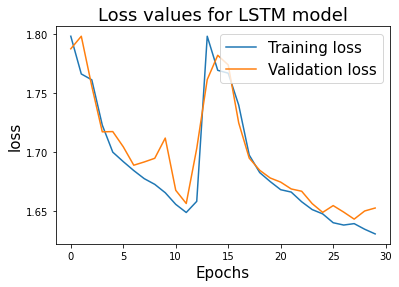

In [16]:
#The loss curve
plt.plot(history1.history['loss'], label='Training loss')
plt.plot(history1.history['val_loss'], label='Validation loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.legend()
plt.title('Loss values for LSTM model')
plt.show()

In [18]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 128)         32768     
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 9)                 1161      
                                                                 
Total params: 165,513
Trainable params: 165,513
Non-trainable params: 0
_________________________________________________________________


## RNN

In [19]:
# defining the model architecture
model2 = Sequential() 
model2.add(Embedding(256, 128)) 
model2.add(SimpleRNN(128, dropout = 0.2, recurrent_dropout = 0.2)) #RNN layer
model2.add(Dense(9, activation = 'sigmoid'))

In [20]:
#The loss is categorical crossentropy (9 classes) and the optimizer is adam.
model2.compile(loss = 'categorical_crossentropy', 
   optimizer = 'adam', metrics = ['accuracy'])

In [21]:
# Fitting the model and saving logs in history
history2 = model2.fit(
   X_train_padded, y_train_padded, 
   batch_size = 32, 
   epochs = 30, 
   validation_data = (X_test_padded, y_test_padded)
)

Epoch 1/30
144/144 [==============================] - 21s 142ms/step - loss: 1.9126 - accuracy: 0.3983 - val_loss: 1.8439 - val_accuracy: 0.4530
Epoch 2/30
144/144 [==============================] - 23s 159ms/step - loss: 1.8275 - accuracy: 0.4495 - val_loss: 1.7949 - val_accuracy: 0.4530
Epoch 3/30
144/144 [==============================] - 25s 172ms/step - loss: 1.8049 - accuracy: 0.4521 - val_loss: 1.7914 - val_accuracy: 0.4530
Epoch 4/30
144/144 [==============================] - 24s 163ms/step - loss: 1.8051 - accuracy: 0.4525 - val_loss: 1.8004 - val_accuracy: 0.4530
Epoch 5/30
144/144 [==============================] - 25s 176ms/step - loss: 1.7993 - accuracy: 0.4529 - val_loss: 1.7902 - val_accuracy: 0.4530
Epoch 6/30
144/144 [==============================] - 27s 187ms/step - loss: 1.7887 - accuracy: 0.4542 - val_loss: 1.7938 - val_accuracy: 0.4573
Epoch 7/30
144/144 [==============================] - 27s 191ms/step - loss: 1.7634 - accuracy: 0.4623 - val_loss: 1.7324 - val_ac

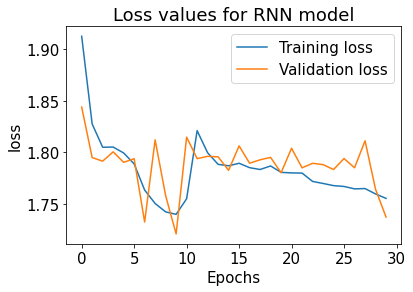

In [22]:
#The loss curve
plt.plot(history2.history['loss'], label='Training loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.legend()
plt.title('Loss values for RNN model')
plt.show()

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         32768     
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense_1 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 66,825
Trainable params: 66,825
Non-trainable params: 0
_________________________________________________________________


## GRU

In [24]:
# defining the model architecture
model3 = Sequential() 
model3.add(Embedding(256, 128)) 
model3.add(GRU(128, dropout = 0.2, recurrent_dropout = 0.2)) #GRU layer
model3.add(Dense(9, activation = 'sigmoid'))

In [25]:
#The loss is categorical crossentropy (9 classes) and the optimizer is adam.
model3.compile(loss = 'categorical_crossentropy', 
   optimizer = 'adam', metrics = ['accuracy'])

In [26]:
# Fitting the model and saving logs in history
history3 = model3.fit(
   X_train_padded, y_train_padded, 
   batch_size = 32, 
   epochs = 30, 
   validation_data = (X_test_padded, y_test_padded)
)

Epoch 1/30
144/144 [==============================] - 77s 521ms/step - loss: 1.8019 - accuracy: 0.4481 - val_loss: 1.7915 - val_accuracy: 0.4530
Epoch 2/30
144/144 [==============================] - 76s 527ms/step - loss: 1.7449 - accuracy: 0.4606 - val_loss: 1.7206 - val_accuracy: 0.4617
Epoch 3/30
144/144 [==============================] - 77s 535ms/step - loss: 1.6813 - accuracy: 0.4745 - val_loss: 1.6719 - val_accuracy: 0.4895
Epoch 4/30
144/144 [==============================] - 77s 536ms/step - loss: 1.6475 - accuracy: 0.4869 - val_loss: 1.6539 - val_accuracy: 0.4930
Epoch 5/30
144/144 [==============================] - 78s 544ms/step - loss: 1.6241 - accuracy: 0.4922 - val_loss: 1.6545 - val_accuracy: 0.4887
Epoch 6/30
144/144 [==============================] - 78s 543ms/step - loss: 1.6226 - accuracy: 0.4939 - val_loss: 1.6433 - val_accuracy: 0.4974
Epoch 7/30
144/144 [==============================] - 78s 543ms/step - loss: 1.6141 - accuracy: 0.4967 - val_loss: 1.6405 - val_ac

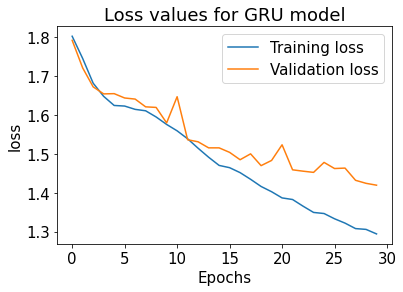

In [27]:
#The loss curve
plt.plot(history3.history['loss'], label='Training loss')
plt.plot(history3.history['val_loss'], label='Validation loss')
matplotlib.rc('font', size=15)
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel('loss', fontsize = 15)
plt.legend()
plt.title('Loss values for GRU model')
plt.show()

In [28]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 128)         32768     
                                                                 
 gru (GRU)                   (None, 128)               99072     
                                                                 
 dense_2 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 133,001
Trainable params: 133,001
Non-trainable params: 0
_________________________________________________________________


## Testing

In [30]:
#LSTM predictions
predictions1 = model1.predict(X_test_padded)

#RNN predictions
predictions2 = model2.predict(X_test_padded)

#GRU predictions
predictions3 = model3.predict(X_test_padded)

36/36 [==============================] - 2s 56ms/step


In [46]:
# LSTM Test accuracy
accuracy1 = acc(np.argmax(predictions1, axis = 1), np.argmax(y_test, axis = 1))

# RNN Test accuracy
accuracy2 = acc(np.argmax(predictions2, axis = 1), np.argmax(y_test, axis = 1))

# GRU Test accuracy
accuracy3 = acc(np.argmax(predictions3, axis = 1), np.argmax(y_test, axis = 1))

print('Test accuracy for LSTM model is: ', accuracy1)
print('Test accuracy for RNN model is: ', accuracy2)
print('Test accuracy for GRU model is: ', accuracy3)

Test accuracy for LSTM model is:  0.4930313588850174
Test accuracy for RNN model is:  0.445993031358885
Test accuracy for GRU model is:  0.5357142857142857
